In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
df=pd.read_csv("./Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df=df.drop("User ID",axis=1)
df["Gender"].replace(["Male","Female"],[1,0],inplace=True)

In [4]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [5]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [8]:
minmax.fit(x_train)

x_train_scaled=minmax.fit_transform(x_train)
x_test_scaled=minmax.fit_transform(x_test)

**Fitting Random Forest to the Training set**

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
train=[]
test=[]
for i in range(50,200,20):
    rdf=RandomForestClassifier(n_estimators=i,random_state=44,oob_score=True)
    rdf.fit(x_train_scaled,y_train)
    train.append(rdf.score(x_train_scaled,y_train))
    test.append(rdf.oob_score_)

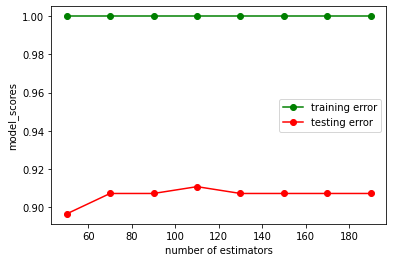

In [25]:
plt.plot(range(50,200,20),train,label="training error",marker="o",color="green")
plt.plot(range(50,200,20),test,label="testing error",marker="o",color="red")
plt.xlabel("number of estimators")
plt.ylabel("model_scores")
plt.legend()
plt.show()

In [26]:
# n_estimators=110 has low variance
rdf=RandomForestClassifier(n_estimators=110,random_state=44,oob_score=True)
rdf.fit(x_train_scaled,y_train)

RandomForestClassifier(n_estimators=110, oob_score=True, random_state=44)

**Predicting the Test set results**

In [28]:
y_test_predict=rdf.predict(x_test_scaled)
y_train_predict=rdf.predict(x_train_scaled)


**Making the Confusion Matrix**

In [29]:
from sklearn.metrics import confusion_matrix

train_matrix=confusion_matrix(y_train,y_train_predict)
test_matrix=confusion_matrix(y_test,y_test_predict)

**Visualising the Training set results**

<AxesSubplot:>

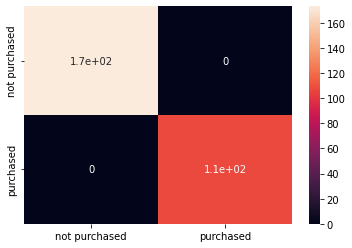

In [37]:
import seaborn as sns
sns.heatmap(train_matrix,annot=True,xticklabels=["not purchased","purchased"],yticklabels=["not purchased","purchased"])

**Visualising the Test set results**

<AxesSubplot:>

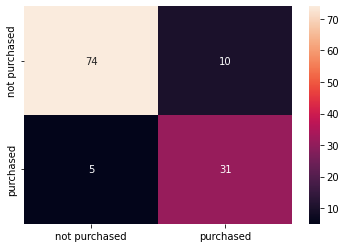

In [36]:
sns.heatmap(test_matrix,annot=True,xticklabels=["not purchased","purchased"],yticklabels=["not purchased","purchased"])